### This notebook presents a multi-layer perceptron for multi-class classification using softmax activation 

## Stepwise Implementation:

### 1. Import the necessary libraries

In [1]:
import tensorflow as tf 
import numpy as np 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Activation 
import matplotlib.pyplot as plt 

### 2. Load the MNIST dataset from keras library

TensorFlow allows us to read the MNIST dataset and we can load it directly in the program as a train and test dataset.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() 

### 3. Convert the pixels into floating-point values

The pixel values range from 0 to 256, apart from 0 the range is 255. Dividing all the values by 255 to convert the range from 0 to 1.

Converting the pixel values into floating-point values helps in computation becomes easier and faster. 


In [3]:
# Cast the records into float values 
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
  
# normalize image pixel values by dividing  
# by 255 
gray_scale = 255
x_train /= gray_scale 
x_test /= gray_scale 

In [4]:
print("Training data:", x_train.shape) 
print("Test data:", x_test.shape) 
print("Training label data:", y_train.shape) 
print("Test label data:", y_test.shape) 

Training data: (60000, 28, 28)
Test data: (10000, 28, 28)
Training label data: (60000,)
Test label data: (10000,)


In total there are 60,000 records in the training dataset and 10,000 records in the test dataset and every image is of the size 28×28

### 4. Visualize the data

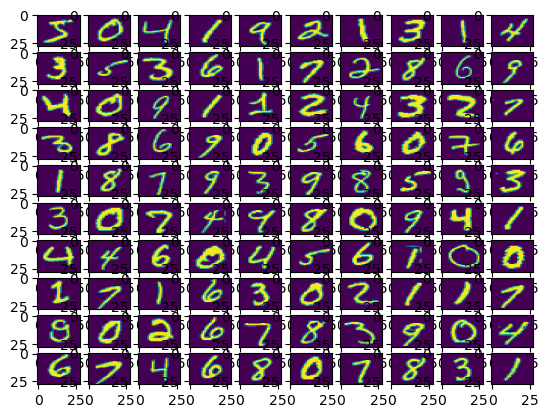

In [5]:
fig, ax = plt.subplots(10, 10) 
k = 0
for i in range(10): 
    for j in range(10): 
        ax[i][j].imshow(x_train[k].reshape(28, 28),  
                        aspect='auto') 
        k += 1
plt.show() 

### 5. Define the network

In [6]:
model = Sequential([ 
    
    # reshape 28 row * 28 column data to 28*28 rows 
    Flatten(input_shape=(28, 28)), 
    
      # hidden dense layer 1 
    Dense(128, activation='relu', name='L1'),   
    
    # hidden dense layer 2 
    Dense(64, activation='relu', name='L2'),  
    
      # output layer 
    Dense(10, activation='softmax', name='L3'),   ## prefer softmax activation for multi-class classification
]) 

C:\Users\FDUSER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


The Sequential model creates the model layer-by-layer as needed in a multi-layer perceptron, with a sigmoid activation function at each of the layers.

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L1 (Dense)                      │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

#### Get the weights and bias for each layer

In [8]:
W1, b1 = model.get_layer("L1").get_weights()
W2, b2 = model.get_layer("L2").get_weights()
W3, b3 = model.get_layer("L3").get_weights()

print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)
print(f"W3{W3.shape}:\n", W3, f"\nb3{b3.shape}:", b3)

W1(784, 128):
 [[-0.04299478 -0.02237464 -0.03722843 ...  0.01973648 -0.03019002
   0.07150609]
 [-0.05697289 -0.0610367   0.06442861 ...  0.05102942 -0.05427766
   0.07143284]
 [ 0.02866474 -0.02749533 -0.05365375 ...  0.03265543  0.07093815
  -0.02675313]
 ...
 [-0.03694153  0.03927516  0.06970163 ...  0.00133348 -0.06267924
   0.06671629]
 [-0.02531182  0.01020283  0.00217684 ... -0.07524355  0.02564997
   0.07033037]
 [-0.05387967  0.05870775 -0.05055165 ... -0.06712329  0.04977333
   0.01464731]] 
b1(128,): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
W2(128, 64):
 [[ 0.1610045   0.00819807  0.15823312 ... -0.10905185  0.00949109
  -0.084517

### 6. Compile the model

The model.compile statement defines a loss function and specifies a compile optimization.


In [9]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 

### 7. Fit the model

The model.fit statement runs gradient descent and fits the weights to the data.

In [10]:
history= model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test)) 

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8775 - loss: 0.4161 - val_accuracy: 0.9554 - val_loss: 0.1454
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9684 - loss: 0.1044 - val_accuracy: 0.9725 - val_loss: 0.0925
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9796 - loss: 0.0697 - val_accuracy: 0.9732 - val_loss: 0.0958
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9836 - loss: 0.0524 - val_accuracy: 0.9729 - val_loss: 0.0868
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9868 - loss: 0.0407 - val_accuracy: 0.9762 - val_loss: 0.0819
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9903 - loss: 0.0313 - val_accuracy: 0.9734 - val_loss: 0.0901
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9913 - loss: 0.0266 - val_accuracy: 0.9771 - val_loss: 0.0771
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9928 - loss: 0.0205 - 

In [11]:
# Examine the change in weights and biases at each layer
W1, b1 = model.get_layer("L1").get_weights()
W2, b2 = model.get_layer("L2").get_weights()
W3, b3 = model.get_layer("L3").get_weights()

print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)
print(f"W3{W3.shape}:\n", W3, f"\nb3{b3.shape}:", b3)

W1(784, 128):
 [[-0.04299478 -0.02237464 -0.03722843 ...  0.01973648 -0.03019002
   0.07150609]
 [-0.05697289 -0.0610367   0.06442861 ...  0.05102942 -0.05427766
   0.07143284]
 [ 0.02866474 -0.02749533 -0.05365375 ...  0.03265543  0.07093815
  -0.02675313]
 ...
 [-0.03694153  0.03927516  0.06970163 ...  0.00133348 -0.06267924
   0.06671629]
 [-0.02531182  0.01020283  0.00217684 ... -0.07524355  0.02564997
   0.07033037]
 [-0.05387967  0.05870775 -0.05055165 ... -0.06712329  0.04977333
   0.01464731]] 
b1(128,): [-0.03209146 -0.00919491  0.15127553  0.01259843  0.17600271 -0.00991058
 -0.09956704  0.1149503  -0.18927556 -0.19627792 -0.02896456  0.03189474
 -0.00245097  0.07413553 -0.02691019  0.06339804  0.20215805 -0.05409584
  0.09744643 -0.07594287 -0.07832585 -0.02914506  0.07562766  0.04048974
  0.06342251  0.1116147  -0.05641928  0.00846825  0.03193766  0.03192064
  0.11293159  0.14477813  0.07833004 -0.05261288 -0.04254932  0.03342956
  0.08769122  0.19654427 -0.07423901  0.0958

### 8. Find Accuracy and loss for the model

In [12]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose = 1) 
print('test loss, test acc:', test_loss, test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.9705 - loss: 0.1213
test loss, test acc: 0.10317811369895935 0.9750000238418579


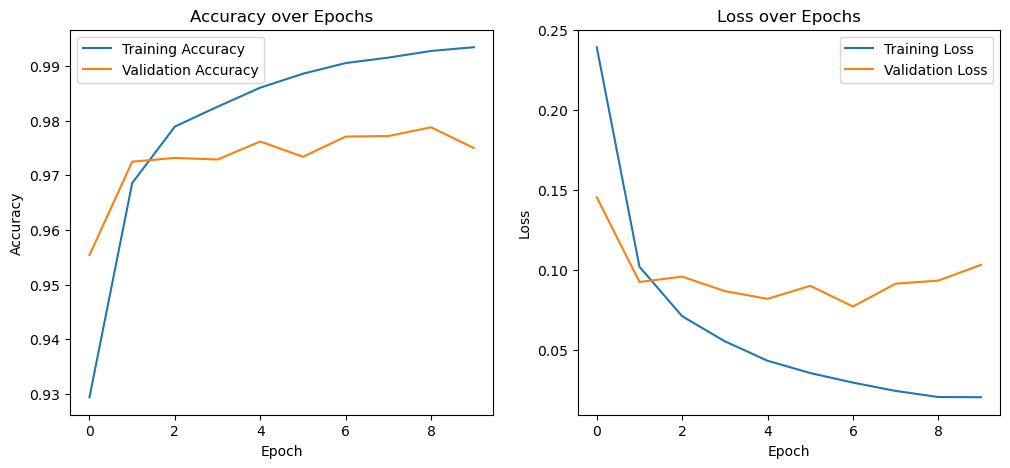

In [13]:
# Plot accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 9. Evalaute other performance metrics

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Predict class probabilities for the test data
y_pred_probs = model.predict(x_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate Precision, Recall, and F1-score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step
Precision: 0.9753430323537209
Recall: 0.974738444455572
F1 Score: 0.974857151318299


# Evaluative Section: 

## Construct a Multi-layer Perceptron model for the CIFAR-10 dataset and evaluate its performance. Evalate model performace with respect to sigmoid vs softmax activation.

#### About the dataset: The CIFAR (Canadian Institute For Advanced Research)-10 is one of the most widely used datasets for machine learning research.  It consists of 60,000 32x32 color images in 10 classes, with 6000 images per class. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

### Download the dataset:

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Training data:", X_train.shape)
print("Test data:", X_test.shape)
print("Training label data:", y_train.shape)
print("Test label data:", y_test.shape)


Training data: (50000, 32, 32, 3)
Test data: (10000, 32, 32, 3)
Training label data: (50000, 10)
Test label data: (10000, 10)


C:\Users\FDUSER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2691 - loss: 2.0017 - val_accuracy: 0.3064 - val_loss: 1.9291
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3770 - loss: 1.7402 - val_accuracy: 0.4025 - val_loss: 1.6637
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4115 - loss: 1.6473 - val_accuracy: 0.4280 - val_loss: 1.6016
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4291 - loss: 1.5932 - val_accuracy: 0.4296 - val_loss: 1.5852
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4522 - loss: 1.5296 - val_accuracy: 0.4508 - val_loss: 1.5436
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4569 - loss: 1.5172 - val_accuracy: 0.4474 - val_loss: 1.5413
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4615 - loss: 1.5015 - val_accuracy: 0.4636 - val_loss: 1.5081
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4723 - loss: 1.4785 - 

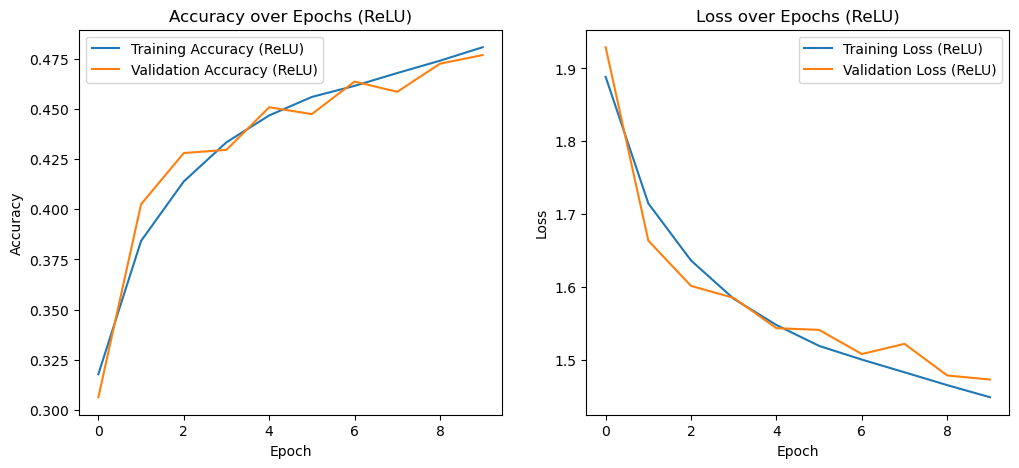

In [17]:
# Build the model with ReLU activation
model_relu = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten the 32x32x3 images into 1D
    Dense(128, activation='relu', name='L1'),
    Dense(64, activation='relu', name='L2'),
    Dense(10, activation='softmax', name='L3')  # Softmax for multi-class classification
])

# Compile the model
model_relu.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Train the model
history_relu = model_relu.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss_relu, test_acc_relu = model_relu.evaluate(X_test, y_test, verbose=1)
print('ReLU model - Test loss:', test_loss_relu, 'Test accuracy:', test_acc_relu)

# Plot accuracy and loss for ReLU activation
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_relu.history['accuracy'], label='Training Accuracy (ReLU)')
plt.plot(history_relu.history['val_accuracy'], label='Validation Accuracy (ReLU)')
plt.title('Accuracy over Epochs (ReLU)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_relu.history['loss'], label='Training Loss (ReLU)')
plt.plot(history_relu.history['val_loss'], label='Validation Loss (ReLU)')
plt.title('Loss over Epochs (ReLU)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2163 - loss: 2.1156 - val_accuracy: 0.3396 - val_loss: 1.8417
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3341 - loss: 1.8422 - val_accuracy: 0.3407 - val_loss: 1.8110
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3603 - loss: 1.7768 - val_accuracy: 0.3773 - val_loss: 1.7357
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3772 - loss: 1.7311 - val_accuracy: 0.3785 - val_loss: 1.7400
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3898 - loss: 1.7039 - val_accuracy: 0.3950 - val_loss: 1.6838
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3942 - loss: 1.6838 - val_accuracy: 0.3939 - val_loss: 1.6825
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4118 - loss: 1.6485 - val_accuracy: 0.4113 - val_loss: 1.6613
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4102 - loss: 1.6481 - 

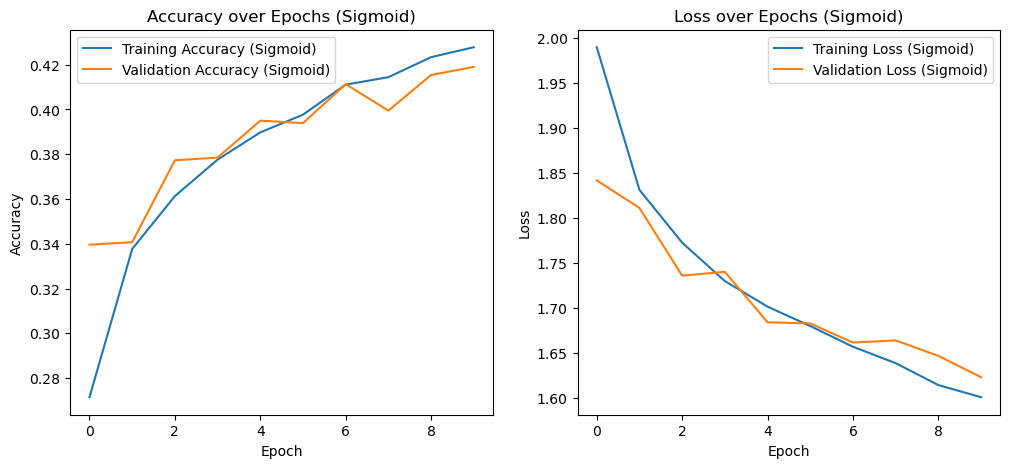

In [18]:
# Build the model with Sigmoid activation
model_sigmoid = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten the 32x32x3 images into 1D
    Dense(128, activation='sigmoid', name='L1'),
    Dense(64, activation='sigmoid', name='L2'),
    Dense(10, activation='softmax', name='L3')  # Softmax for multi-class classification
])

# Compile the model
model_sigmoid.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Train the model
history_sigmoid = model_sigmoid.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss_sigmoid, test_acc_sigmoid = model_sigmoid.evaluate(X_test, y_test, verbose=1)
print('Sigmoid model - Test loss:', test_loss_sigmoid, 'Test accuracy:', test_acc_sigmoid)

# Plot accuracy and loss for Sigmoid activation
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_sigmoid.history['accuracy'], label='Training Accuracy (Sigmoid)')
plt.plot(history_sigmoid.history['val_accuracy'], label='Validation Accuracy (Sigmoid)')
plt.title('Accuracy over Epochs (Sigmoid)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_sigmoid.history['loss'], label='Training Loss (Sigmoid)')
plt.plot(history_sigmoid.history['val_loss'], label='Validation Loss (Sigmoid)')
plt.title('Loss over Epochs (Sigmoid)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2477 - loss: 2.0583 - val_accuracy: 0.3367 - val_loss: 1.8404
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3499 - loss: 1.8164 - val_accuracy: 0.3703 - val_loss: 1.7653
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3737 - loss: 1.7431 - val_accuracy: 0.3867 - val_loss: 1.7167
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3869 - loss: 1.7001 - val_accuracy: 0.3899 - val_loss: 1.7101
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3955 - loss: 1.6850 - val_accuracy: 0.3925 - val_loss: 1.7097
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4026 - loss: 1.6544 - val_accuracy: 0.4060 - val_loss: 1.6674
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4062 - loss: 1.6382 - val_accuracy: 0.4077 - val_loss: 1.6593
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4127 - loss: 1.6241 - 

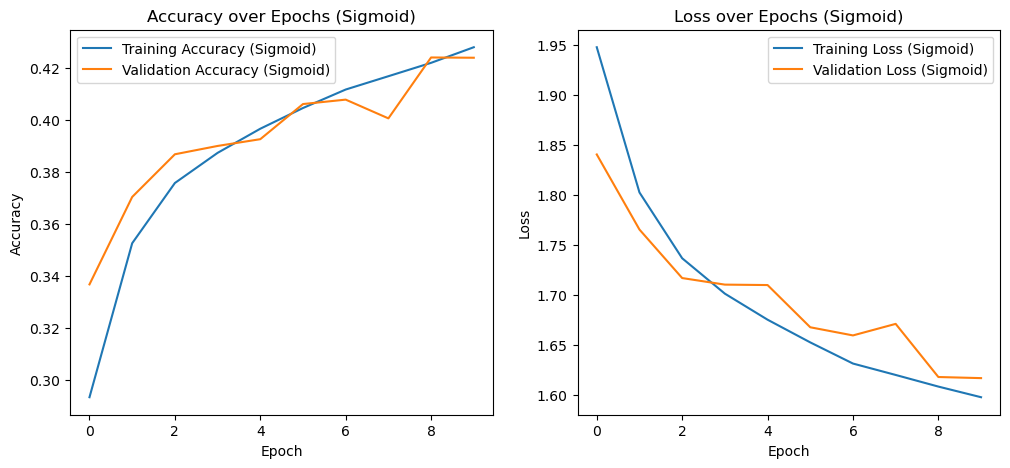

In [19]:
# Build the model with Sigmoid activation
model_sigmoid = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten the 32x32x3 images into 1D
    Dense(128, activation='sigmoid', name='L1'),
    Dense(64, activation='sigmoid', name='L2'),
    Dense(10, activation='softmax', name='L3')  # Softmax for multi-class classification
])

# Compile the model
model_sigmoid.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Train the model
history_sigmoid = model_sigmoid.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss_sigmoid, test_acc_sigmoid = model_sigmoid.evaluate(X_test, y_test, verbose=1)
print('Sigmoid model - Test loss:', test_loss_sigmoid, 'Test accuracy:', test_acc_sigmoid)

# Plot accuracy and loss for Sigmoid activation
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_sigmoid.history['accuracy'], label='Training Accuracy (Sigmoid)')
plt.plot(history_sigmoid.history['val_accuracy'], label='Validation Accuracy (Sigmoid)')
plt.title('Accuracy over Epochs (Sigmoid)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_sigmoid.history['loss'], label='Training Loss (Sigmoid)')
plt.plot(history_sigmoid.history['val_loss'], label='Validation Loss (Sigmoid)')
plt.title('Loss over Epochs (Sigmoid)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [20]:
# Predict class probabilities for the test data
y_pred_probs_relu = model_relu.predict(X_test)
y_pred_probs_sigmoid = model_sigmoid.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_relu = np.argmax(y_pred_probs_relu, axis=1)
y_pred_sigmoid = np.argmax(y_pred_probs_sigmoid, axis=1)

# Convert true labels to class labels
y_true = np.argmax(y_test, axis=1)

# Calculate Precision, Recall, and F1-score for ReLU model
precision_relu = precision_score(y_true, y_pred_relu, average='macro')
recall_relu = recall_score(y_true, y_pred_relu, average='macro')
f1_relu = f1_score(y_true, y_pred_relu, average='macro')

print(f'ReLU Model - Precision: {precision_relu}')
print(f'ReLU Model - Recall: {recall_relu}')
print(f'ReLU Model - F1 Score: {f1_relu}')

# Calculate Precision, Recall, and F1-score for Sigmoid model
precision_sigmoid = precision_score(y_true, y_pred_sigmoid, average='macro')
recall_sigmoid = recall_score(y_true, y_pred_sigmoid, average='macro')
f1_sigmoid = f1_score(y_true, y_pred_sigmoid, average='macro')

print(f'Sigmoid Model - Precision: {precision_sigmoid}')
print(f'Sigmoid Model - Recall: {recall_sigmoid}')
print(f'Sigmoid Model - F1 Score: {f1_sigmoid}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
ReLU Model - Precision: 0.48053746393974067
ReLU Model - Recall: 0.4768
ReLU Model - F1 Score: 0.47232551074837525
Sigmoid Model - Precision: 0.4239836501302032
Sigmoid Model - Recall: 0.42380000000000007
Sigmoid Model - F1 Score: 0.4053453267553618


Model with Sigmoid Activation Function

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score, f1_score

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Training data:", X_train.shape)
print("Test data:", X_test.shape)
print("Training label data:", y_train.shape)
print("Test label data:", y_test.shape)


Training data: (50000, 32, 32, 3)
Test data: (10000, 32, 32, 3)
Training label data: (50000, 10)
Test label data: (10000, 10)


In [22]:
# Build the model with Sigmoid activation
model_sigmoid = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten the 32x32x3 images into a 1D vector
    Dense(128, activation='sigmoid', name='L1'),  # Hidden layer with 128 neurons and Sigmoid activation
    Dense(64, activation='sigmoid', name='L2'),   # Hidden layer with 64 neurons and Sigmoid activation
    Dense(10, activation='softmax', name='L3')   # Output layer with 10 classes and Softmax activation
])

# Compile the model
model_sigmoid.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Train the model
history_sigmoid = model_sigmoid.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


C:\Users\FDUSER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2577 - loss: 2.0409 - val_accuracy: 0.3532 - val_loss: 1.8220
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3505 - loss: 1.7997 - val_accuracy: 0.3480 - val_loss: 1.7823
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3715 - loss: 1.7350 - val_accuracy: 0.3697 - val_loss: 1.7508
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3880 - loss: 1.7063 - val_accuracy: 0.3990 - val_loss: 1.6736
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4011 - loss: 1.6670 - val_accuracy: 0.4019 - val_loss: 1.6591
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.4071 - loss: 1.6428 - val_accuracy: 0.3904 - val_loss: 1.6772
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4163 - loss: 1.6268 - val_accuracy: 0.3862 - val_loss: 1.7099
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4194 - loss: 1.6255 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.4123 - loss: 1.6239
Sigmoid model - Test loss: 1.62831449508667 Test accuracy: 0.4147000014781952


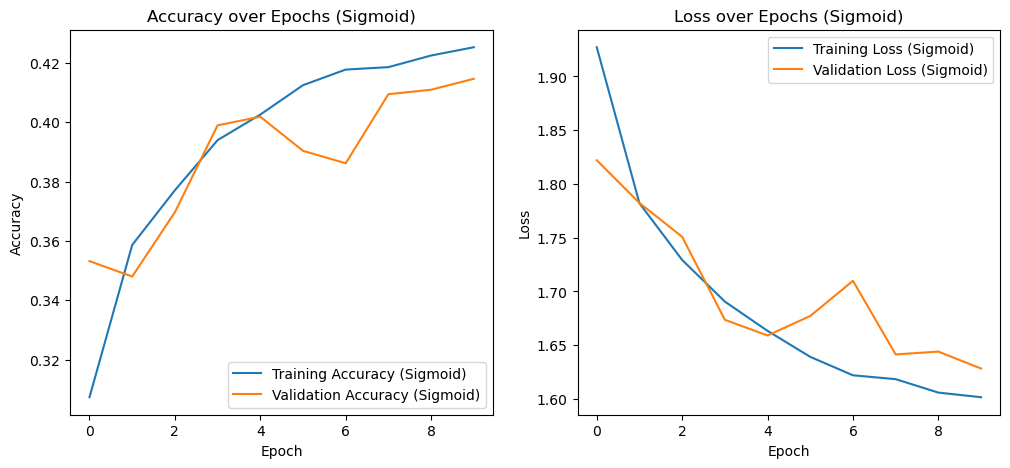

In [23]:
# Evaluate the model
test_loss_sigmoid, test_acc_sigmoid = model_sigmoid.evaluate(X_test, y_test, verbose=1)
print('Sigmoid model - Test loss:', test_loss_sigmoid, 'Test accuracy:', test_acc_sigmoid)

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_sigmoid.history['accuracy'], label='Training Accuracy (Sigmoid)')
plt.plot(history_sigmoid.history['val_accuracy'], label='Validation Accuracy (Sigmoid)')
plt.title('Accuracy over Epochs (Sigmoid)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_sigmoid.history['loss'], label='Training Loss (Sigmoid)')
plt.plot(history_sigmoid.history['val_loss'], label='Validation Loss (Sigmoid)')
plt.title('Loss over Epochs (Sigmoid)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [24]:
# Predict class probabilities for the test data
y_pred_probs_sigmoid = model_sigmoid.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_sigmoid = np.argmax(y_pred_probs_sigmoid, axis=1)

# Convert true labels to class labels
y_true = np.argmax(y_test, axis=1)

# Calculate Precision, Recall, and F1-score for Sigmoid model
precision_sigmoid = precision_score(y_true, y_pred_sigmoid, average='macro')
recall_sigmoid = recall_score(y_true, y_pred_sigmoid, average='macro')
f1_sigmoid = f1_score(y_true, y_pred_sigmoid, average='macro')

print(f'Sigmoid Model - Precision: {precision_sigmoid}')
print(f'Sigmoid Model - Recall: {recall_sigmoid}')
print(f'Sigmoid Model - F1 Score: {f1_sigmoid}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step
Sigmoid Model - Precision: 0.4262015455365922
Sigmoid Model - Recall: 0.4147
Sigmoid Model - F1 Score: 0.411311202715571
